<a href="https://colab.research.google.com/github/sahushubham3107/Real_Estates_Price_Prediction/blob/main/Project2_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DRAGON Real Estates Price Predictor Company**

- Given dataset of house prices along with some features like no. of bathrooms, no of bedrooms. etc
- Using these input features our model will predict the price for any new house by looking at the features.
- This model work with actual dataset or no artificial training data is used.

In [1]:
import pandas as pd  
housing = pd.read_csv("data.csv")

In [2]:
# reading the first five values of the dataset
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,NaN,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# general information of the dataset
 ## to check whether any entry is missing or not
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
# Just to check the counts of the data
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

- Above output is showing that out of 506 entries in column of CHAS, 471 entries are 0 and remaining 35 entries are 1

In [5]:
# To get all the details about the numeric data in the whole dataset
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285786,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703709,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# importing library to see all plots in a line
%matplotlib inline  

- Plotting the histograms of all the data for visual inspection of the data in a form of subplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6b7a999d0>,
      dtype=object)

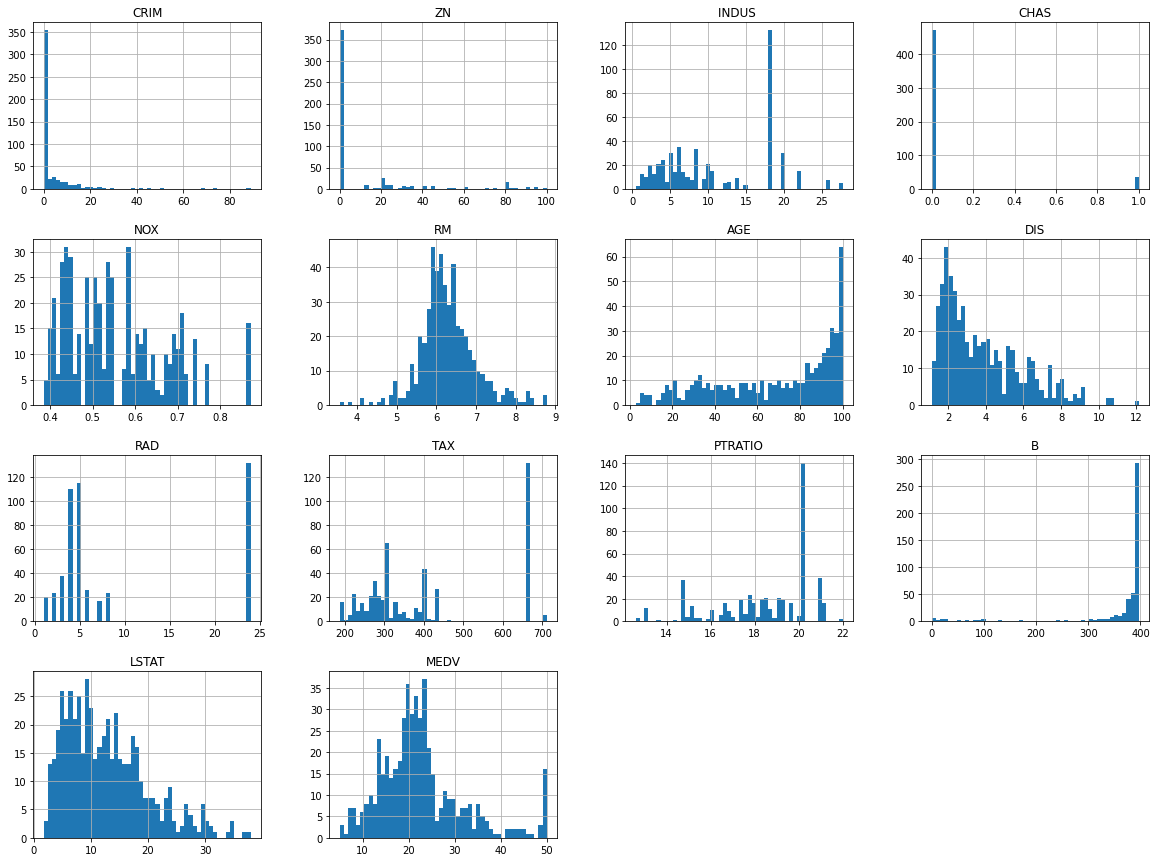

In [7]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))   # to plot the histogram

In [8]:
# Importing the numpy library
import numpy as np

**Splitting the test data from the training data**

- Algorithm for splitting the test-train data

import numpy as np

def split_train_test(data, test_ratio):

np.random.seed(42)  # this won't allow to reshuffle data again and again because if the test data comes under training set our model will becomes overfitted

  shuffled=np.random.permutation(len(data))  # this will apply permutation in the test data over its length

print(shuffled)

  test_set_size=int(len(data) * test_ratio)  # this will define the size of test_set

  test_indices = shuffled[:test_set_size] 

  train_indices = shuffled[test_set_size:]

  return data.iloc[train_indices], data.iloc[test_indices]

- The above return program is also saved in scikit learn library of python , we have just write the code for our understanding, Now we are going to use sklearn library

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing)

In [10]:
# splitting the test set and training set
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [11]:
# to see how many data are assigned to training set and test set
print(f"Rows in train set: {len(train_set)}\n")
print(f"Rows in test set: {len(test_set)}")

Rows in train set: 404

Rows in test set: 102


**Stratified Sampling**
- Like in this example if CHAS is binary varible or it contains only two values either 0 or 1 but if the training set randomly takes similar type of value let say 1, then while we predict our test data it will got confuse and won't predict the model accurately so here we need stratified sampling to overcome this problem 

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [13]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [14]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

- Here from the stratified split we got almost the same ratio of the 0's and 1's as it is present in the original dataset


In [15]:
housing = strat_train_set.copy()  # taking copy of train set in housing

**Now lets look at the Corelation between the data**

In [16]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

# MEDV that comes out from the output is called Strong Positive correlation
  # positive values are positive correlation means by the increment of those values in the dataset our MEDV will also increase

MEDV       1.000000
RM         0.679458
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6aa3a33d0>,
      dtype=object)

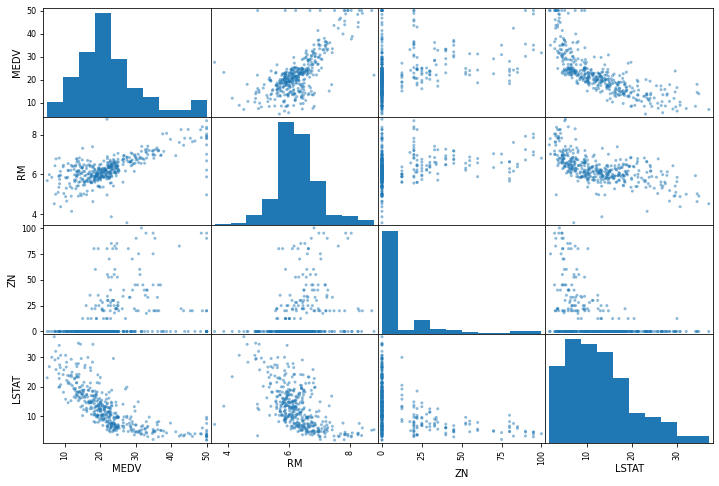

In [17]:
# plotting the corelation between four features
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

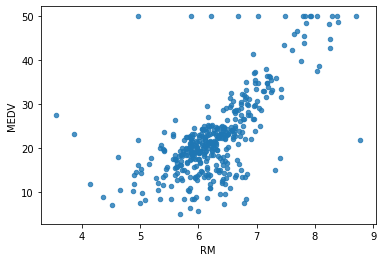

In [18]:
housing.plot(kind='scatter', x="RM", y="MEDV", alpha=0.8)
# here we are just plotting the corelation between RM and MEDV so that we can remove the outlet so that our model's accuracy increases

**Attributes Combinations**

Trying this method if we want to define new features and want to see that how this new feature relates with the data

Like in this case we have defined the new feature named as 'TAXRM'

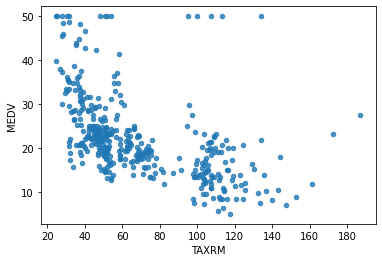

In [19]:
housing['TAXRM']=housing['TAX']/housing['RM']
housing.head()
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)
housing.plot(kind='scatter', x="TAXRM", y="MEDV", alpha=0.8)

In [20]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

**Missing Attributes**

To take care of missing attributes we have three options:
- Get rid of the missing data point
- Get rid of the whole attributes
- Set the value to some value (either 0 or mean or mode which is suitable)

In [21]:
# For Option 1
a = housing.dropna(subset=['RM'])
a.shape
# Also note that original housing dataframe will be as it is before

(400, 13)

In [22]:
# For Option 2 
housing.drop("RM", axis=1).shape  # if you want to drop column then use axis=1
# Note that column RM will not be visible anymore
# Also note that original housing dataframe will be as it is before

(404, 12)

In [23]:
# For Option 3 
median = housing["RM"].median()  # this line will compute median for Option 3
housing["RM"].fillna(median)
housing.shape

(404, 13)

Checking the data of housing before imputing through describe function

In [24]:
# before we started filling missing attributes
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280312,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.713848,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


But it may also happen that missing data may also occurs in test data set


In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [26]:
imputer.statistics_ # this will find median for all the columns or features

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [27]:
x = imputer.transform(housing)
housing_tr = pd.DataFrame(x, columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279616,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.710330,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


**Sci_Kit Learn Design**

Primarily there are three types of objects are present there in scikit learn
- Estimators - It estimates some parameter based on dataset. Eg. imputer. It has fit method and transform method.

  Fit Method - Fits the dataset and calculates internal parameters

- Transformers - Transform method takes input and returns output based on the learning from fit(). It also has a convenience function called fit_transform() which fits and then transforms. 
- Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

**Feature Scaling**

There are two types of feature scaling method
- Min Max Scaling (Normalization)

  (Value-min)/(max-min)

  sklearn provides a class called MinMaxScaler for this
- Standardization

  (value-mean)/std

  Sklearn provides a class called StandardScaler for this

***Creating a pipeline ***

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
   ('imputer', SimpleImputer(strategy= "median")),
   #.. you can add as many as you want in your pipeline
   ('std_scaler', StandardScaler()),
])

In [29]:
housing_num_tr = my_pipeline.fit_transform(housing)
# Remember here that here housing_num_tr is a numpy array lets check it by printing
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [30]:
housing_num_tr.shape

(404, 13)

**Selecting a desired model for Dragon Real Estates**

In [31]:
from sklearn.linear_model import LinearRegression # we have tried this model earlier and this has returned the error value as 23.. which is showing less efficiency of this model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [32]:
some_data = housing.iloc[:5]   # for 5 features dataset
some_labels = housing_labels.iloc[:5]  # for  5 output or 'MEDV' in this case corresponds to that 5 features
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)  #predicted data from the model

array([22.198, 25.375, 16.557, 23.319, 23.427])

In [33]:
list(some_labels)  # Actual Output values corresponding to dataset

[21.9, 24.5, 16.7, 23.1, 23.0]

***Note ***Always remember don't use test data until all your model is prepared finally with all the training dataset otherwise model will read all the errors and noise from the test data as well and it will become overfitted model*** :- ***

**Evaluating the Model using the RMS method**

In [34]:
from sklearn.metrics import mean_squared_error  
housing_predictions = model.predict(housing_num_tr)  
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [35]:
rmse

1.1994342540143539

Here our error is coming zero that means it has detected the noise and pattern and that's why return error as zero here.

**Using better evaluation technique i.e. Cross Validation**

In [36]:
# Distributing the data into 10 equal datasets
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [37]:
rmse_scores

array([2.85212408, 2.66535235, 4.35359225, 2.55815611, 3.36257222,
       2.66545234, 4.3017627 , 3.61253254, 3.18179036, 3.39213585])

In [38]:
def print_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Std Deviation:", scores.std())

In [39]:
print_scores(rmse_scores)  # change the model form the above 3 whichever you want but generally RandomForestRegressor will work best

Scores: [2.85212408 2.66535235 4.35359225 2.55815611 3.36257222 2.66545234
 4.3017627  3.61253254 3.18179036 3.39213585]
Mean: 3.294547081234252
Std Deviation: 0.615929847243977


**Saving the Model**

We will here now use joblib to deploy this model

In [40]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

**Model Testing**

In [41]:
## Now we are set to test our model for the test data set
x_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [42]:
print('The final RMSE in the test data is : ',final_rmse)

The final RMSE in the test data is :  2.854413866209284


**The following things we need to keep in mind after this project:**
- We need to finetune this model or we have tried just three models
- This dataset is not very large 
- RMSE is very less so we can say RandomForestRegressor is best model in this case, this may not be true for some other problem


In [43]:
## Rough Cell to just print the prepared data in which we can alter the values to check the model
## lets print 1st row of prepared data
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24190026, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

**Using the Model- Launching the Model RandomForestRegressor** 

In [44]:
from joblib import dump, load
model = load('Dragon.joblib')

In [45]:
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -2.24190026, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
print('The predicted value from the model according to the given features is : ',model.predict(features))

The predicted value from the model according to the given features is :  [21.336]
